In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# для отрисовки временного ряда с разметкой неисправностей
from utils import plot_failure

In [2]:
def drop_rows(X, y, df):
    '''Функция для исключения нужных строк из X и y по датам
    df - датафрейм с данными, которые нужно удалить'''

    rows = []
    start_col = df['ДАТА_НАЧАЛА_НЕИСПРАВНОСТИ']
    end_col = df['ДАТА_УСТРАНЕНИЯ_НЕИСПРАВНОСТИ']

    for start, end in zip(start_col, end_col):
        indexes = X.loc[(X.index >= start) & (X.index <= end)].index
        rows.extend(indexes)
    
    return X.drop(rows), y.drop(rows)

In [ ]:
#ЭКСГАУСТЕР №4

In [3]:
X_columns = [
       'ЭКСГАУСТЕР 4. ТОК РОТОРА 1', 'ЭКСГАУСТЕР 4. ТОК РОТОРА2',
       'ЭКСГАУСТЕР 4. ТОК СТАТОРА', 'ЭКСГАУСТЕР 4. ДАВЛЕНИЕ МАСЛА В СИСТЕМЕ',
       'ЭКСГАУСТЕР 4. ТЕМПЕРАТУРА ПОДШИПНИКА НА ОПОРЕ 1',
       'ЭКСГАУСТЕР 4. ТЕМПЕРАТУРА ПОДШИПНИКА НА ОПОРЕ 2',
       'ЭКСГАУСТЕР 4. ТЕМПЕРАТУРА ПОДШИПНИКА НА ОПОРЕ 3',
       'ЭКСГАУСТЕР 4. ТЕМПЕРАТУРА ПОДШИПНИКА НА ОПОРЕ 4',
       'ЭКСГАУСТЕР 4. ТЕМПЕРАТУРА МАСЛА В СИСТЕМЕ',
       'ЭКСГАУСТЕР 4. ТЕМПЕРАТУРА МАСЛА В МАСЛОБЛОКЕ',
       'ЭКСГАУСТЕР 4. ВИБРАЦИЯ НА ОПОРЕ 1',
       'ЭКСГАУСТЕР 4. ВИБРАЦИЯ НА ОПОРЕ 2',
       'ЭКСГАУСТЕР 4. ВИБРАЦИЯ НА ОПОРЕ 3',
       'ЭКСГАУСТЕР 4. ВИБРАЦИЯ НА ОПОРЕ 3. ПРОДОЛЬНАЯ.',
       'ЭКСГАУСТЕР 4. ВИБРАЦИЯ НА ОПОРЕ 4',
       'ЭКСГАУСТЕР 4. ВИБРАЦИЯ НА ОПОРЕ 4. ПРОДОЛЬНАЯ.']

In [4]:
y_columns = [
    'Y_ЭКСГАУСТЕР А/М №4_ЭЛЕКТРОДВИГАТЕЛЬ ДСПУ-140-84-4 ЭКСГ. №4',
    'Y_ЭКСГАУСТЕР А/М №4_ПОДШИПНИК ОПОРНЫЙ ЭКСГ. №4',
    'Y_ЭКСГАУСТЕР А/М №4_УЛИТА ЭКСГ. №4',
    'Y_ЭКСГАУСТЕР А/М №4_РЕДУКТОР ГАЗ. ЗАДВИЖКИ ЭКСГ. №4',
    'Y_ЭКСГАУСТЕР А/М №4_МАСЛОНАСОС РАБОЧИЙ ЭКСГ. №4',
    'Y_ЭКСГАУСТЕР А/М №4_ЭЛЕКТРОАППАРАТУРА ЭКСГ. №4',
    'Y_ЭКСГАУСТЕР А/М №4_ПОДШИПНИК ОПОРНЫЙ №2 ЭКСГ. №4',
    'Y_ЭКСГАУСТЕР А/М №4_ЗАДВИЖКА ЭКСГ. №4',
    'Y_ЭКСГАУСТЕР А/М №4_ГСМ ЭКСГ. №4',
    'Y_ЭКСГАУСТЕР А/М №4_ВК 310С ВИБРОПРЕОБРАЗОВАТЕЛЬ ЭКСГ.№4 Т.1',
    'Y_ЭКСГАУСТЕР А/М №4_ТСМТ-101-010-50М-400 ТЕРМОПР.ПОДШ.Т.1',
    'Y_ЭКСГАУСТЕР А/М №4_РОТОР ЭКСГ. №4',
    'Y_ЭКСГАУСТЕР А/М №4_МАСЛООХЛАДИТЕЛЬ  М-05-1 ЭКСГ. №4',
    'Y_ЭКСГАУСТЕР А/М №4_ПОДШИПНИК ОПОРНО-УПОРНЫЙ ЭКСГ. №4',
    'Y_ЭКСГАУСТЕР А/М №4_ЭКСГАУСТЕР А/М №4',
    'Y_ЭКСГАУСТЕР А/М №4_ЗАП. И РЕГ. АРМАТУРА ЭКСГ.№4',
    'Y_ЭКСГАУСТЕР А/М №4_ПОДШИПНИК ОПОРНЫЙ №1 ЭКСГ. №4',
    'Y_ЭКСГАУСТЕР А/М №4_ЭЛ/ДВИГАТЕЛЬ ГАЗ. ЗАДВИЖКИ ЭКСГ. №4',
    'Y_ЭКСГАУСТЕР А/М №4_КЛ1 ТР№4 ДО ЭД ЭКСГАУСТЕРА №4',
    'Y_ЭКСГАУСТЕР А/М №4_КЛ2 ТР№4 ДО ЭД ЭКСГАУСТЕРА №4',
    'Y_ЭКСГАУСТЕР А/М №4_ТР-Р ТМ-4000-10/6 ЭКСГ. №4',
    'Y_ЭКСГАУСТЕР А/М №4_ТИРИСТ. ВОЗБУДИТЕЛЬ ВТ-РЭМ-400 ЭКСГ4 ВУ1',
    'Y_ЭКСГАУСТЕР А/М №4_МАСЛОПРОВОДЫ ЭКСГ №4'
]

In [5]:
X = pd.read_parquet('../data/X_train.parquet', columns=X_columns)
y = pd.read_parquet('../data/y_train.parquet', columns=y_columns)

messages = pd.read_excel('../data/processed/messages_processed.xlsx')
messages.shape

(970, 10)

In [6]:
# Найдем плановые ремонты

planned_repair_1 = messages[messages.iloc[:, 9] == 'ТЕХНИЧЕСКИЕ ПЛАНОВЫЕ'].copy()
planned_repair_2 = messages[messages.iloc[:, 9] == 'ТЕХНОЛОГИЧЕСКИЕ ПЛАНОВЫЕ'].copy()
planned_repair = pd.concat([planned_repair_1, planned_repair_2], axis=0)

print(planned_repair.shape)
planned_repair

(15, 10)


,Unnamed: 0,МАШИНА,ИМЯ_МАШИНЫ,ТЕХ_МЕСТО,НАЗВАНИЕ_ТЕХ_МЕСТА,ВИД_СООБЩЕНИЯ,ОПИСАНИЕ,ДАТА_НАЧАЛА_НЕИСПРАВНОСТИ,ДАТА_УСТРАНЕНИЯ_НЕИСПРАВНОСТИ,ТЕКСТ_ГРУППЫ_КОДОВ
95,518,CH-AGP-AG2/003-005,ЭКСГАУСТЕР А/М №5,CH-AGP-AG2/003-005-001-005-003,ЭЛЕКТРОДВИГАТЕЛЬ ДСПУ-140-84-4 ЭКСГ. №5,M1,ТО (замена щеток на эл/двиг. эксг-ра),2019-04-23 15:34:30,2019-04-23 16:05:20,ТЕХНИЧЕСКИЕ ПЛАНОВЫЕ
124,558,CH-AGP-AG2/001-004,ЭКСГАУСТЕР А/М №4,NaN,NaN,M1,СР,2019-05-14 06:38:10,2019-05-18 01:08:50,ТЕХНИЧЕСКИЕ ПЛАНОВЫЕ
142,579,CH-AGP-AG2/011,ЭКСГАУСТЕР А/М №9,NaN,NaN,M1,капитальный ремонт,2019-06-10 08:00:00,2019-06-21 00:44:30,ТЕХНИЧЕСКИЕ ПЛАНОВЫЕ
402,969,CH-AGP-AG2/001-005,ЭКСГАУСТЕР А/М №4,CH-AGP-AG2/001-005,ЭКСГАУСТЕР А/М №4,M1,ТО,2020-04-10 09:05:10,2020-04-10 12:44:30,ТЕХНИЧЕСКИЕ ПЛАНОВЫЕ
441,1050,CH-AGP-AG2/005-004,ЭКСГАУСТЕР А/М №6,NaN,NaN,M1,ППР,2020-05-22 05:24:00,2020-05-31 04:01:30,ТЕХНИЧЕСКИЕ ПЛАНОВЫЕ
529,1220,CH-AGP-AG2/003-004,ЭКСГАУСТЕР А/М №5,NaN,NaN,M1,Средний ремонт,2020-08-25 23:21:30,2020-08-30 23:32:20,ТЕХНИЧЕСКИЕ ПЛАНОВЫЕ
586,1341,CH-AGP-AG2/001-005,ЭКСГАУСТЕР А/М №4,CH-AGP-AG2/001-005-003-002,РЕДУКТОР ГАЗ. ЗАДВИЖКИ ЭКСГ. №4,M1,ТО(замена редуктора газовой задвижки №4),2020-10-26 14:07:40,2020-10-26 15:43:40,ТЕХНИЧЕСКИЕ ПЛАНОВЫЕ
625,1418,CH-AGP-AG2/007-005,ЭКСГАУСТЕР А/М №7,CH-AGP-AG2/007-005,ЭКСГАУСТЕР А/М №7,M1,ТО согласованное,2020-12-24 09:44:40,2020-12-24 15:04:10,ТЕХНИЧЕСКИЕ ПЛАНОВЫЕ
659,1484,AA2/004-006,ЭКСГАУСТЕР А/М №7,AA2/004-006,ЭКСГАУСТЕР А/М №7,M1,ТО,2021-01-27 08:17:50,2021-01-27 14:21:20,ТЕХНИЧЕСКИЕ ПЛАНОВЫЕ
724,1659,NaN,ЭКСГАУСТЕР А/М №7,NaN,NaN,M1,Капитальный ремонт,2021-04-13 02:42:00,2021-04-22 15:24:40,ТЕХНИЧЕСКИЕ ПЛАНОВЫЕ


In [7]:
print(X.shape)

# Уберем плановые ремонты из X и y
X, y = drop_rows(X, y, planned_repair)

(9335034, 16)


In [8]:
print(X.shape)
print(y.shape)

(8959130, 16)
(8959130, 23)


In [9]:
# Возьмем только один y

y = y['Y_ЭКСГАУСТЕР А/М №4_ПОДШИПНИК ОПОРНЫЙ ЭКСГ. №4']
y.value_counts()

Y_ЭКСГАУСТЕР А/М №4_ПОДШИПНИК ОПОРНЫЙ ЭКСГ. №4
2.0    6475071
0.0    2484059
Name: count, dtype: int64

In [11]:
y.isna().sum()

0

In [ ]:
# При плановых и неплановых останавках останавливается вся линия или только один эксгаустер?
# Пока будем считать, что при неплановой остановке эксгаустера этот период необходимо
# исключить из рассмотрения, если он не относится к целевой переменной и не прогнозируется M1

In [10]:
# Исключение всех M1 для данного эксгаустера

M1 = messages[messages['ВИД_СООБЩЕНИЯ']=='M1']
M1_ex4 = M1[M1['ИМЯ_МАШИНЫ']=='ЭКСГАУСТЕР А/М №4']
print('Количество М1 для эксгаустера №4 -', len(M1_ex4))

# Исключаем нужные строки из X и y по датам
X, y = drop_rows(X, y, M1_ex4)

Количество М1 для эксгаустера №4 - 19


In [12]:
print(X.shape)
print(y.shape)

(8954778, 16)
(8954778,)


In [ ]:
# Исключение всех M1 для данного эксгаустера, кроме целевых M1


M0 (2483078,)
M1 (0,)
M3 (6471700,)


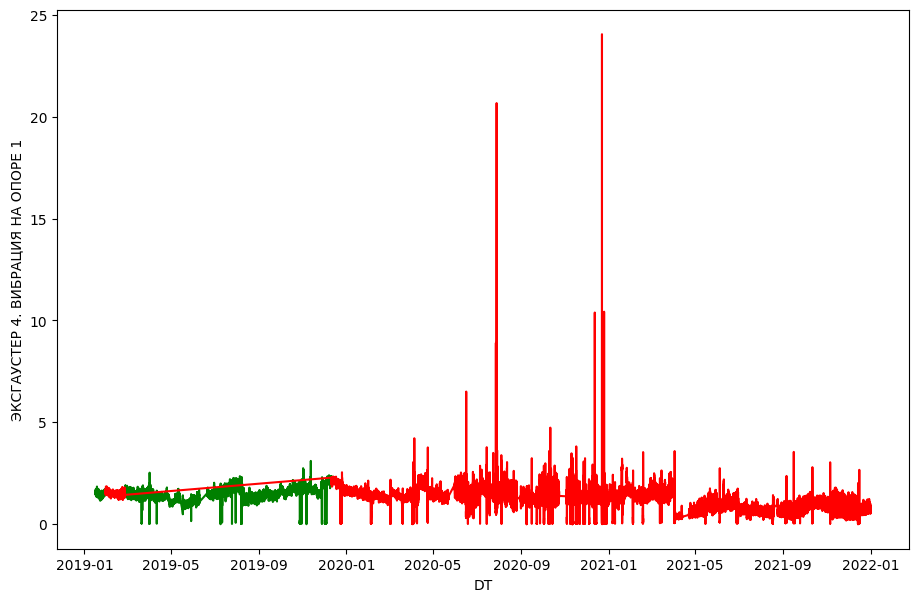

In [13]:
plot_failure(X['ЭКСГАУСТЕР 4. ВИБРАЦИЯ НА ОПОРЕ 1'], y)

In [14]:
# Аварии без сообщения о завершении
messages['ДАТА_УСТРАНЕНИЯ_НЕИСПРАВНОСТИ'].isna().sum()

130

In [13]:
# Оставляем начальный интервал X и y до первого сообщения о поломке, не имеющей даты устранения

# Находим первое такое сообщение для нужного эксгаустера

endless_fail = messages[messages['ДАТА_УСТРАНЕНИЯ_НЕИСПРАВНОСТИ'].isna()].copy()

y.name

'Y_ЭКСГАУСТЕР А/М №4_ПОДШИПНИК ОПОРНЫЙ ЭКСГ. №4'

In [14]:
endless_fail = endless_fail[endless_fail['НАЗВАНИЕ_ТЕХ_МЕСТА'].apply(lambda x: x in y.name)]

print(endless_fail.shape)
endless_fail

(5, 10)


,Unnamed: 0,МАШИНА,ИМЯ_МАШИНЫ,ТЕХ_МЕСТО,НАЗВАНИЕ_ТЕХ_МЕСТА,ВИД_СООБЩЕНИЯ,ОПИСАНИЕ,ДАТА_НАЧАЛА_НЕИСПРАВНОСТИ,ДАТА_УСТРАНЕНИЯ_НЕИСПРАВНОСТИ,ТЕКСТ_ГРУППЫ_КОДОВ
331,842,CH-AGP-AG2/001-005,ЭКСГАУСТЕР А/М №4,CH-AGP-AG2/001-005-001-004,ПОДШИПНИК ОПОРНЫЙ ЭКСГ. №4,M3,утечка масла,2020-01-16 14:27:30,NaT,NaN
345,865,CH-AGP-AG2/001-005,ЭКСГАУСТЕР А/М №4,CH-AGP-AG2/001-005-001-004,ПОДШИПНИК ОПОРНЫЙ ЭКСГ. №4,M3,течь масла,2020-01-28 17:01:40,NaT,NaN
355,882,CH-AGP-AG2/001-005,ЭКСГАУСТЕР А/М №4,CH-AGP-AG2/001-005-001-004,ПОДШИПНИК ОПОРНЫЙ ЭКСГ. №4,M3,течь масла,2020-02-09 08:58:30,NaT,NaN
383,934,CH-AGP-AG2/001-005,ЭКСГАУСТЕР А/М №4,CH-AGP-AG2/001-005-001-004,ПОДШИПНИК ОПОРНЫЙ ЭКСГ. №4,M3,утечка смазки на опорном под-ке №2,2020-03-20 22:20:20,NaT,NaN
826,1899,CH-AGP-AG2/001-005,ЭКСГАУСТЕР А/М №4,CH-AGP-AG2/001-005-001-004,ПОДШИПНИК ОПОРНЫЙ ЭКСГ. №4,M3,Утечка масла,2021-07-27 11:38:00,NaT,NaN


In [15]:
# Прибавляем M3_min = 8 минут к первому сообщению

date = endless_fail['ДАТА_НАЧАЛА_НЕИСПРАВНОСТИ'].iloc[0] + pd.Timedelta(minutes=8)
print(date)

# Обрезаем выборку
X_train = X[:date]
y_train = y[:date]

2020-01-16 14:35:30


In [16]:
print(X_train.shape)
print(y_train.shape)

(3027868, 16)
(3027868,)


In [17]:
X_train.isna().sum() / X_train.shape[0]

ЭКСГАУСТЕР 4. ТОК РОТОРА 1                         0.038502
ЭКСГАУСТЕР 4. ТОК РОТОРА2                          0.040396
ЭКСГАУСТЕР 4. ТОК СТАТОРА                          0.038975
ЭКСГАУСТЕР 4. ДАВЛЕНИЕ МАСЛА В СИСТЕМЕ             0.040429
ЭКСГАУСТЕР 4. ТЕМПЕРАТУРА ПОДШИПНИКА НА ОПОРЕ 1    0.032990
ЭКСГАУСТЕР 4. ТЕМПЕРАТУРА ПОДШИПНИКА НА ОПОРЕ 2    0.041028
ЭКСГАУСТЕР 4. ТЕМПЕРАТУРА ПОДШИПНИКА НА ОПОРЕ 3    0.032983
ЭКСГАУСТЕР 4. ТЕМПЕРАТУРА ПОДШИПНИКА НА ОПОРЕ 4    0.039185
ЭКСГАУСТЕР 4. ТЕМПЕРАТУРА МАСЛА В СИСТЕМЕ          0.044202
ЭКСГАУСТЕР 4. ТЕМПЕРАТУРА МАСЛА В МАСЛОБЛОКЕ       0.042248
ЭКСГАУСТЕР 4. ВИБРАЦИЯ НА ОПОРЕ 1                  0.044116
ЭКСГАУСТЕР 4. ВИБРАЦИЯ НА ОПОРЕ 2                  0.043488
ЭКСГАУСТЕР 4. ВИБРАЦИЯ НА ОПОРЕ 3                  0.044162
ЭКСГАУСТЕР 4. ВИБРАЦИЯ НА ОПОРЕ 3. ПРОДОЛЬНАЯ.     0.031274
ЭКСГАУСТЕР 4. ВИБРАЦИЯ НА ОПОРЕ 4                  0.040975
ЭКСГАУСТЕР 4. ВИБРАЦИЯ НА ОПОРЕ 4. ПРОДОЛЬНАЯ.     0.039808
dtype: float64

In [18]:
# Удалим пропуски, идущие подряд в столбце, если их доля больше 0,03

In [22]:
# Интерполируем пропуски
X_train = X_train.interpolate()

M0 (2483078,)
M1 (0,)
M3 (544790,)


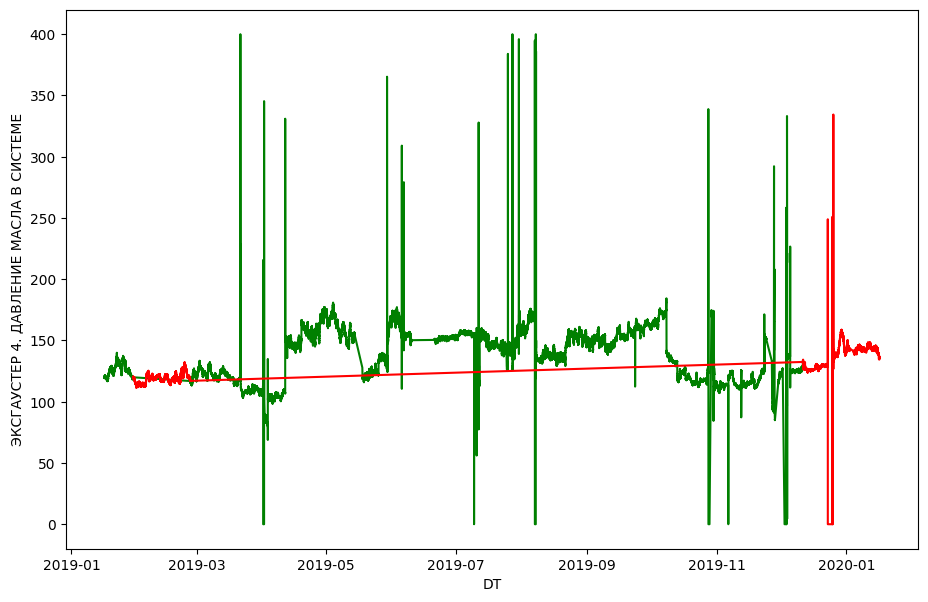

In [19]:
# График начального участка
plot_failure(X_train['ЭКСГАУСТЕР 4. ДАВЛЕНИЕ МАСЛА В СИСТЕМЕ'], y_train)

M0 (2483078,)
M1 (0,)
M3 (544790,)


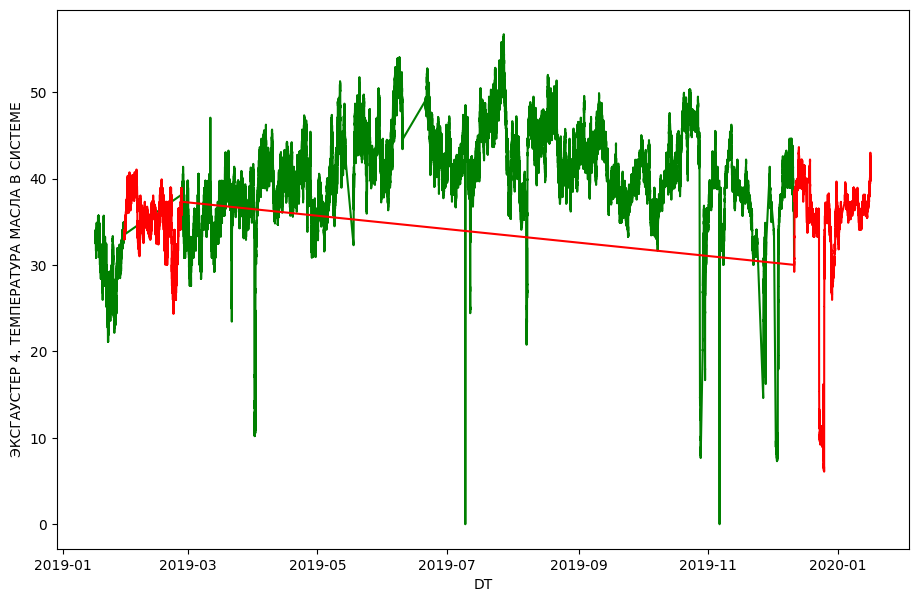

In [20]:
# График начального участка
plot_failure(X_train['ЭКСГАУСТЕР 4. ТЕМПЕРАТУРА МАСЛА В СИСТЕМЕ'], y_train)

M0 (2483078,)
M1 (0,)
M3 (544790,)


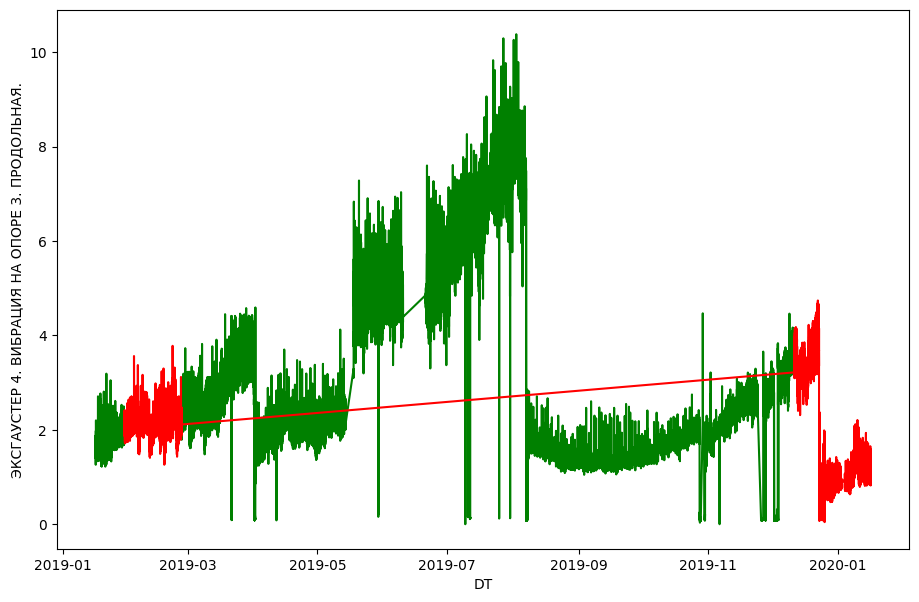

In [27]:
# График начального участка
plot_failure(X_train['ЭКСГАУСТЕР 4. ВИБРАЦИЯ НА ОПОРЕ 3. ПРОДОЛЬНАЯ.'], y_train)

In [23]:
# Корреляции начального участка
X_train.corrwith(y_train)

ЭКСГАУСТЕР 4. ТОК РОТОРА 1                        -0.008238
ЭКСГАУСТЕР 4. ТОК РОТОРА2                         -0.011658
ЭКСГАУСТЕР 4. ТОК СТАТОРА                          0.001655
ЭКСГАУСТЕР 4. ДАВЛЕНИЕ МАСЛА В СИСТЕМЕ            -0.181555
ЭКСГАУСТЕР 4. ТЕМПЕРАТУРА ПОДШИПНИКА НА ОПОРЕ 1   -0.101187
ЭКСГАУСТЕР 4. ТЕМПЕРАТУРА ПОДШИПНИКА НА ОПОРЕ 2    0.015759
ЭКСГАУСТЕР 4. ТЕМПЕРАТУРА ПОДШИПНИКА НА ОПОРЕ 3   -0.166426
ЭКСГАУСТЕР 4. ТЕМПЕРАТУРА ПОДШИПНИКА НА ОПОРЕ 4   -0.073578
ЭКСГАУСТЕР 4. ТЕМПЕРАТУРА МАСЛА В СИСТЕМЕ         -0.288454
ЭКСГАУСТЕР 4. ТЕМПЕРАТУРА МАСЛА В МАСЛОБЛОКЕ      -0.079485
ЭКСГАУСТЕР 4. ВИБРАЦИЯ НА ОПОРЕ 1                  0.117270
ЭКСГАУСТЕР 4. ВИБРАЦИЯ НА ОПОРЕ 2                 -0.110261
ЭКСГАУСТЕР 4. ВИБРАЦИЯ НА ОПОРЕ 3                 -0.212799
ЭКСГАУСТЕР 4. ВИБРАЦИЯ НА ОПОРЕ 3. ПРОДОЛЬНАЯ.    -0.223397
ЭКСГАУСТЕР 4. ВИБРАЦИЯ НА ОПОРЕ 4                 -0.108895
ЭКСГАУСТЕР 4. ВИБРАЦИЯ НА ОПОРЕ 4. ПРОДОЛЬНАЯ.    -0.173361
dtype: float64

In [34]:
X_train.to_parquet('../data/processed/ex4_M3_X_all_for_y_2.parquet')
y_train.to_frame().to_parquet('../data/processed/ex4_M3_y_2.parquet')
type(y_train)

pandas.core.series.Series